# PREVISÃO DE DENGUE EM SÃO PAULO - SP

## Italo Giullian Carvalho de Albuquerque

#### 1) SINAN: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/   
#### 2) INMET: https://bdmep.inmet.gov.br/

### O que eu quero responder com esse dataset: 

- Identificar a disseminação de casos de dengue; 

- Descrever as variáveis climáticas; 

- Verificar se as variáveis climáticas têm relação com os casos notificados de dengue; 

- Realizar previsão utilizando Regressão Linear e Random Forest Regressor.

# 0.0 IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('dadosDENGUECLIMA.xlsx')

## 0.1 Funções

In [3]:
def __prepare_data_multi(data, campos, alvo, prazo):
        features_considered = campos
        features = data[features_considered]
        dataset = pd.DataFrame(features)
        x = dataset.drop([alvo], axis=1)
        y = dataset[alvo].values
        tempo = -prazo
        x_train = x
        x_test = x
        y_train = y
        y_test = y
        return x_train, x_test, y_train, y_test

def RF_multi_dias(self, data, fields, alvo, prazo):
        x_train, x_test, y_train, y_test = __prepare_data_multi(data, fields, alvo, prazo)
        #reg = RandomForestRegressor(max_depth= 50, min_samples_leaf= 1, min_samples_split= 2)
        reg = RandomForestRegressor(max_depth= 100, max_features='auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 400)
        #reg = RandomForestRegressor()
        reg.fit(x_train, y_train)
        #dump(reg, 'dias.joblib') 
        tempo = -prazo
        previsao = reg.predict(x_test)
        previsao5dias = pd.DataFrame(previsao)
        rq_ridge = reg.score(x_train, y_train)
        return previsao5dias, rq_ridge
    
def risco(casos):
    if casos<200:
        return '0' #baixorisco
    else:
        return '1' #altorisco

# 1.0 DESCRICAO DOS DADOS

In [4]:
df1 = df.copy()

In [5]:
df1

,Data,PRECIPITACAO TOTAL,TEMPERATURA MEDIA,UMIDADE RELATIVA DO AR,DENGUE
0,2015-01-31,158.4,25.140323,66.333333,1381
1,2015-02-28,268.4,23.216667,67.125000,7707
2,2015-03-31,327.8,21.879570,77.000000,27877
3,2015-04-30,105.4,20.682917,73.083333,14976
4,2015-05-31,50.8,18.454167,76.000000,5738
...,...,...,...,...,...
67,2020-08-31,66.2,17.554979,69.150000,32
68,2020-09-30,14.6,21.898472,60.380000,47
69,2020-10-31,210.2,21.549731,68.300000,45
70,2020-11-30,135.4,20.581250,68.710000,55


## 1.1 Renomeando as colunas

In [6]:
df1 = df1.rename(columns={'Data': 'data', 'PRECIPITACAO TOTAL': 'chuva', 'TEMPERATURA MEDIA': 'temperatura', 'UMIDADE RELATIVA DO AR': 'umidade',
                          'DENGUE': 'dengue'})

In [7]:
df1

,data,chuva,temperatura,umidade,dengue
0,2015-01-31,158.4,25.140323,66.333333,1381
1,2015-02-28,268.4,23.216667,67.125000,7707
2,2015-03-31,327.8,21.879570,77.000000,27877
3,2015-04-30,105.4,20.682917,73.083333,14976
4,2015-05-31,50.8,18.454167,76.000000,5738
...,...,...,...,...,...
67,2020-08-31,66.2,17.554979,69.150000,32
68,2020-09-30,14.6,21.898472,60.380000,47
69,2020-10-31,210.2,21.549731,68.300000,45
70,2020-11-30,135.4,20.581250,68.710000,55


## 1.2 Dimensão dos dados

In [8]:
print('Numero de linhas:', df1.shape[0])
print('Numero de colunas:', df1.shape[1])

Numero de linhas: 72
Numero de colunas: 5


## 1.3 Tipo dos dados

In [9]:
df1.dtypes

data           datetime64[ns]
chuva                 float64
temperatura           float64
umidade               float64
dengue                  int64
dtype: object

## 1.4 Check NA

In [10]:
df1.isna().sum()

data           0
chuva          0
temperatura    0
umidade        0
dengue         0
dtype: int64

## 1.5 Descrição Estatística

In [11]:
df1.describe()

,chuva,temperatura,umidade,dengue
count,72.000000,72.000000,72.000000,72.000000
mean,134.522778,20.655269,68.899606,1500.125000
std,109.985921,2.287600,5.001118,3980.975986
min,1.400000,15.300972,52.833333,32.000000
25%,47.900000,18.525903,66.160000,94.250000
50%,115.700000,20.861875,68.688333,156.000000
75%,193.400000,22.465322,72.958333,650.250000
max,493.800000,25.140323,77.500000,27877.000000


# 2.0 Analise Exploratoria dos Dados

In [12]:
df2 = df1.copy()

In [13]:
# Criando variáveis dos meses e semanas do ano
df2['mes'] = df2['data'].dt.month
df2['ano'] = df2['data'].dt.year

In [14]:
df2.head()

,data,chuva,temperatura,umidade,dengue,mes,ano
0,2015-01-31,158.4,25.140323,66.333333,1381,1,2015
1,2015-02-28,268.4,23.216667,67.125000,7707,2,2015
2,2015-03-31,327.8,21.879570,77.000000,27877,3,2015
3,2015-04-30,105.4,20.682917,73.083333,14976,4,2015
4,2015-05-31,50.8,18.454167,76.000000,5738,5,2015


In [15]:
df2.set_index('data',inplace = True)

In [16]:
df2

,chuva,temperatura,umidade,dengue,mes,ano
data,,,,,,
2015-01-31,158.4,25.140323,66.333333,1381,1,2015
2015-02-28,268.4,23.216667,67.125000,7707,2,2015
2015-03-31,327.8,21.879570,77.000000,27877,3,2015
2015-04-30,105.4,20.682917,73.083333,14976,4,2015
2015-05-31,50.8,18.454167,76.000000,5738,5,2015
...,...,...,...,...,...,...
2020-08-31,66.2,17.554979,69.150000,32,8,2020
2020-09-30,14.6,21.898472,60.380000,47,9,2020
2020-10-31,210.2,21.549731,68.300000,45,10,2020


In [17]:
df2['dengue'].mean()

1500.125

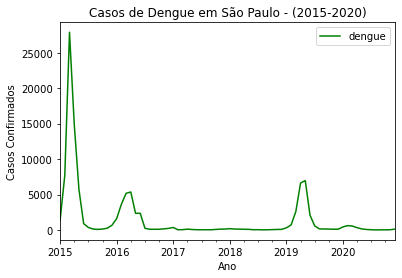

In [18]:
# Comportamento da Dengue 
fig, ax = plt.subplots();

df2['dengue'].plot(kind='line', ax=ax, color='green')
ax.set_title('Casos de Dengue em São Paulo - (2015-2020)')
ax.set_xlabel('Ano')
ax.set_ylabel('Casos Confirmados')
ax.legend();

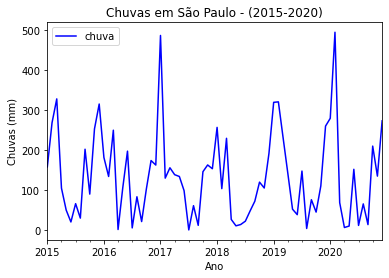

In [19]:
# Comportamento da Chuva
fig, ax = plt.subplots();

df2['chuva'].plot(kind='line', ax=ax, color='blue')
ax.set_title('Chuvas em São Paulo - (2015-2020)')
ax.set_xlabel('Ano')
ax.set_ylabel('Chuvas (mm)')
ax.legend();

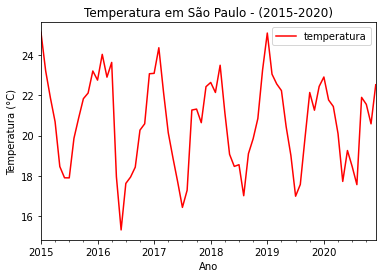

In [20]:
# Comportamento da Temperatura
fig, ax = plt.subplots();

df2['temperatura'].plot(kind='line', ax=ax, color='red')
ax.set_title('Temperatura em São Paulo - (2015-2020)')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura (°C)')
ax.legend();

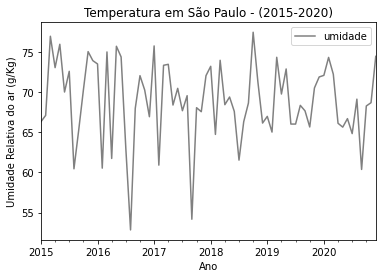

In [21]:
# Comportamento da Umidade
fig, ax = plt.subplots();

df2['umidade'].plot(kind='line', ax=ax, color='gray')
ax.set_title('Temperatura em São Paulo - (2015-2020)')
ax.set_xlabel('Ano')
ax.set_ylabel('Umidade Relativa do ar (g/Kg)')
ax.legend();

In [22]:
df2

,chuva,temperatura,umidade,dengue,mes,ano
data,,,,,,
2015-01-31,158.4,25.140323,66.333333,1381,1,2015
2015-02-28,268.4,23.216667,67.125000,7707,2,2015
2015-03-31,327.8,21.879570,77.000000,27877,3,2015
2015-04-30,105.4,20.682917,73.083333,14976,4,2015
2015-05-31,50.8,18.454167,76.000000,5738,5,2015
...,...,...,...,...,...,...
2020-08-31,66.2,17.554979,69.150000,32,8,2020
2020-09-30,14.6,21.898472,60.380000,47,9,2020
2020-10-31,210.2,21.549731,68.300000,45,10,2020


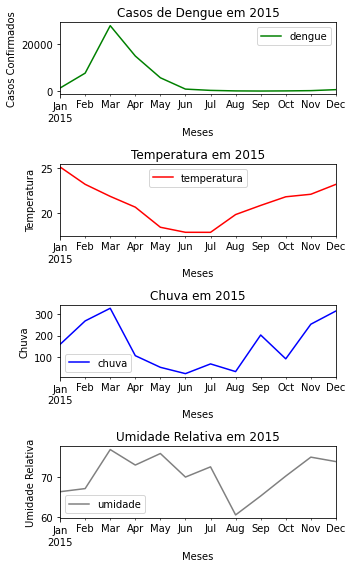

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2015
df2.loc['2015-01-01':'2015-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2015')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2015
df2.loc['2015-01-01':'2015-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2015')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2015
df2.loc['2015-01-01':'2015-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2015')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2015
df2.loc['2015-01-01':'2015-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2015')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

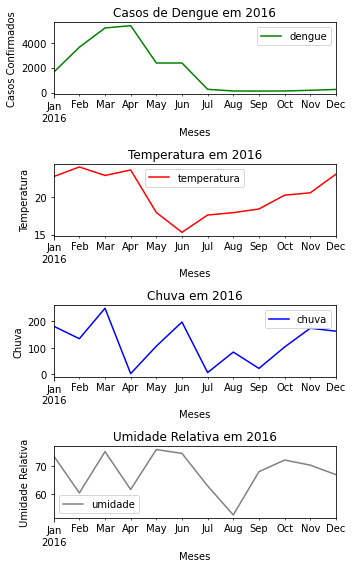

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2016
df2.loc['2016-01-01':'2016-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2016
df2.loc['2016-01-01':'2016-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2016')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2016
df2.loc['2016-01-01':'2016-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2016')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2016
df2.loc['2016-01-01':'2016-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2016')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

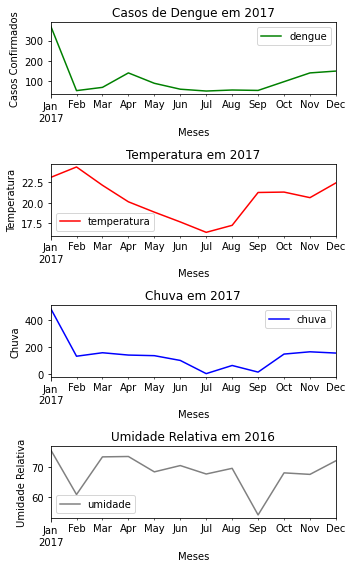

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2017
df2.loc['2017-01-01':'2017-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2017')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2016
df2.loc['2017-01-01':'2017-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2017')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2016
df2.loc['2017-01-01':'2017-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2017')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2016
df2.loc['2017-01-01':'2017-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2016')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

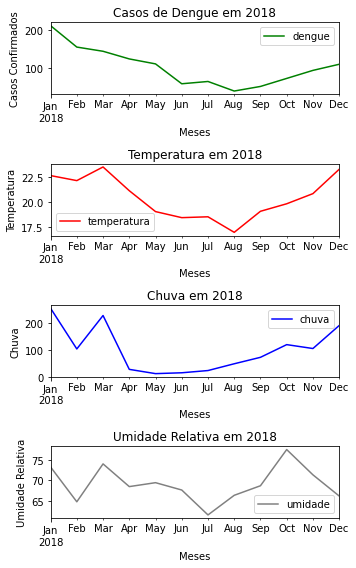

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2018
df2.loc['2018-01-01':'2018-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2018')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2018
df2.loc['2018-01-01':'2018-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2018')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2018
df2.loc['2018-01-01':'2018-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2018')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2018
df2.loc['2018-01-01':'2018-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2018')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

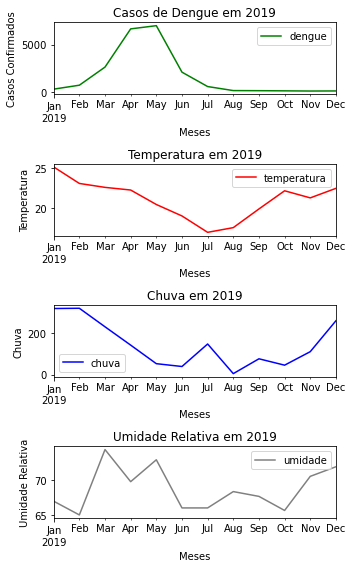

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2019
df2.loc['2019-01-01':'2019-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2019')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2019
df2.loc['2019-01-01':'2019-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2019')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2019
df2.loc['2019-01-01':'2019-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2019')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2019
df2.loc['2019-01-01':'2019-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2019')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

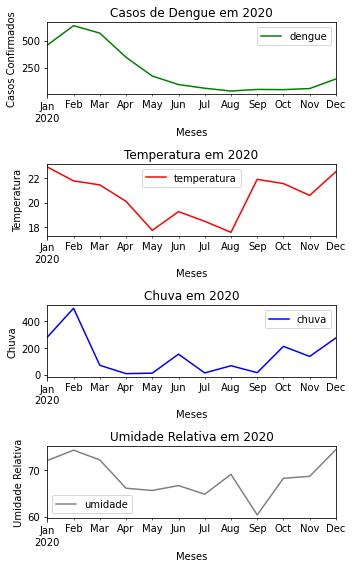

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(5,8));

# Plotar os casos de dengue de 2020
df2.loc['2020-01-01':'2020-12-31', 'dengue'].plot(kind='line', ax=ax1, color='green')
ax1.set_title('Casos de Dengue em 2020')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Casos Confirmados')
ax1.legend();

# Plotar temperatura de 2020
df2.loc['2020-01-01':'2020-12-31', 'temperatura'].plot(kind='line', ax=ax2, color='red')
ax2.set_title('Temperatura em 2020')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Temperatura')
ax2.legend();

# Plotar os chuva de 2020
df2.loc['2020-01-01':'2020-12-31', 'chuva'].plot(kind='line', ax=ax3, color='blue')
ax3.set_title('Chuva em 2020')
ax3.set_xlabel('Meses')
ax3.set_ylabel('Chuva')
ax3.legend();

# Plotar umidade relativa de 2020
df2.loc['2020-01-01':'2020-12-31', 'umidade'].plot(kind='line', ax=ax4, color='gray')
ax4.set_title('Umidade Relativa em 2020')
ax4.set_xlabel('Meses')
ax4.set_ylabel('Umidade Relativa')
ax4.legend();

plt.tight_layout()

# 3.0 PREPARAÇÃO DOS DADOS

In [29]:
df3 = df2.copy()

In [30]:
df3.shape

(72, 6)

In [31]:
df3['risco'] = df3['dengue'].apply(risco)

In [32]:
df3['risco'].value_counts()

0    42
1    30
Name: risco, dtype: int64

In [33]:
df3

,chuva,temperatura,umidade,dengue,mes,ano,risco
data,,,,,,,
2015-01-31,158.4,25.140323,66.333333,1381,1,2015,1
2015-02-28,268.4,23.216667,67.125000,7707,2,2015,1
2015-03-31,327.8,21.879570,77.000000,27877,3,2015,1
2015-04-30,105.4,20.682917,73.083333,14976,4,2015,1
2015-05-31,50.8,18.454167,76.000000,5738,5,2015,1
...,...,...,...,...,...,...,...
2020-08-31,66.2,17.554979,69.150000,32,8,2020,0
2020-09-30,14.6,21.898472,60.380000,47,9,2020,0
2020-10-31,210.2,21.549731,68.300000,45,10,2020,0


In [34]:
# Resetando o index
df3 = df3.reset_index()

In [35]:
df3.head()

,data,chuva,temperatura,umidade,dengue,mes,ano,risco
0,2015-01-31,158.4,25.140323,66.333333,1381,1,2015,1
1,2015-02-28,268.4,23.216667,67.125000,7707,2,2015,1
2,2015-03-31,327.8,21.879570,77.000000,27877,3,2015,1
3,2015-04-30,105.4,20.682917,73.083333,14976,4,2015,1
4,2015-05-31,50.8,18.454167,76.000000,5738,5,2015,1


In [36]:
# Dropando as linhas que apresenta valores menores que 50 na coluna chuva
indexNames = df3[(df3['chuva'] <= 50.0)].index
df3.drop(indexNames , inplace=True)

indexNames = df3[(df3['dengue'] >= 5000.0)].index
df3.drop(indexNames , inplace=True)

In [37]:
df3.shape

(46, 8)

# 4.0 PREVISÃO DE DENGUE

In [38]:
df4 = df3.copy()

In [39]:
# Separando os dados entre feature matrix e target vector

x = df4.drop(columns=['dengue','data','risco'], axis=1)
y = df4['risco']

In [40]:
# NORMALIZANDO OS DADOS

mms = MinMaxScaler()

x = mms.fit_transform(x)

In [41]:
# SEPARANDO EM x e y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## 4.1 Linear Regressor

In [42]:
modelR = LinearRegression()

# Treinando o modelo (Regressão Linear)
modelR.fit(x_train, y_train)

# Fazendo a previsão em cima dos novos dados
y_pred = modelR.predict(x_test)
y_pred

array([ 0.40330894,  0.42888707,  1.47459113,  0.07781947,  0.28907569,
        0.31476894,  0.6233491 , -0.04298949,  0.16275931,  0.73330162])

# 4.2 Random Forest Regressor

In [43]:
dfselect = (df4[['chuva', 'temperatura', 'umidade', 'mes', 'ano', 'dengue', 'risco']])

In [44]:
# SEPARANDO AS COLUNAS EM UMA LISTA
colunas= list (dfselect)
colunas

['chuva', 'temperatura', 'umidade', 'mes', 'ano', 'dengue', 'risco']

In [45]:
# REALIZANDO A PREVISÃO

previsto = RF_multi_dias('self', dfselect, colunas, 'dengue', 30)
previsto

(            0
 0   1342.4150
 1    657.4225
 2    115.5875
 3    141.5650
 4    763.6575
 5    636.7000
 6   1362.9400
 7   2598.0150
 8   2033.5950
 9   2104.3875
 10   601.7200
 11   127.5650
 12   156.7650
 13   537.3200
 14   849.4500
 15   508.2650
 16   115.3100
 17   153.8050
 18    91.3975
 19    78.1400
 20    64.8175
 21   102.1450
 22   133.3600
 23   135.8100
 24   410.8750
 25   146.2050
 26   262.3925
 27    72.3125
 28   287.9575
 29   106.8100
 30   116.5650
 31   598.3200
 32   647.7025
 33  1972.2875
 34   755.6975
 35   139.5225
 36   123.1875
 37   136.1075
 38   463.9750
 39   782.1700
 40   825.8225
 41    86.8750
 42    48.3425
 43    67.7575
 44    75.9700
 45   202.2050,
 0.888009400016975)

In [46]:
y = df4['dengue'].values.reshape(-1, 1)
y_test = y

In [47]:
y_true = y_test
y_pred = previsto[0]
MSE = mean_squared_error(y_true, y_pred)
MAE=  mean_absolute_error(y_true, y_pred)
print("MSE = ", MSE, "MAE=", MAE)

MSE =  68841.44787255437 MAE= 151.52902173913043


In [48]:
dfprevisao = dfselect
dfprevisao['Dias_Previsto'] = previsto[0].values

In [49]:
dfprevisao.head()

,chuva,temperatura,umidade,mes,ano,dengue,risco,Dias_Previsto
0,158.4,25.140323,66.333333,1,2015,1381,1,1342.4150
6,66.8,17.891398,72.625000,7,2015,377,1,657.4225
8,202.4,20.875694,65.250000,9,2015,103,0,115.5875
9,90.6,21.833333,70.291667,10,2015,156,0,141.5650
10,253.0,22.113750,75.083333,11,2015,269,1,763.6575


In [50]:
dfprevisao.describe()

,chuva,temperatura,umidade,mes,ano,dengue,Dias_Previsto
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,176.718261,21.111844,69.873623,6.804348,2017.543478,489.434783,516.113370
std,98.455044,2.293160,4.653141,4.025582,1.669418,792.696373,617.920641
min,61.800000,15.300972,52.833333,1.000000,2015.000000,32.000000,48.342500
25%,105.950000,19.851211,67.145833,3.000000,2016.000000,95.750000,115.831875
50%,153.100000,21.497581,70.395833,7.500000,2017.000000,147.500000,179.485000
75%,224.750000,22.728259,73.468750,10.750000,2019.000000,437.750000,654.992500
max,493.800000,25.140323,77.500000,12.000000,2020.000000,3642.000000,2598.015000
